<a href="https://colab.research.google.com/github/sagihaider/Histopathological_OralCaner_Classification/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/ftmp4cvtmb-1.zip 

--2021-12-29 21:52:18--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/ftmp4cvtmb-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.84.3
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.84.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3098632250 (2.9G) [application/octet-stream]
Saving to: ‘ftmp4cvtmb-1.zip’

ftmp4cvtmb-1.zip    100%[===================>]   2.89G  20.1MB/s    in 2m 29s  

2021-12-29 21:54:47 (19.9 MB/s) - ‘ftmp4cvtmb-1.zip’ saved [3098632250/3098632250]



In [2]:
import os
import glob
import shutil

os.rename('/content/ftmp4cvtmb-1.zip', '/content/data.zip')
from zipfile import ZipFile
file_name = "/content/data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [3]:
base_dir = '/content/data_merged'
if not os.path.exists(base_dir): os.mkdir(base_dir)

normal_dir = os.path.join(base_dir, 'normal')
os.mkdir(normal_dir)

ocss_dir = os.path.join(base_dir, 'oscc')
os.mkdir(ocss_dir)

In [19]:
src_dir = "/content/First Set/100x Normal Oral Cavity Histopathological Images"
dst_dir = "/content/data_merged/normal"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    shutil.copy(jpgfile, dst_dir)

src_dir = "/content/Second Set/400x Normal Oral Cavity Histopathological Images"
dst_dir = "/content/data_merged/normal"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    shutil.copy(jpgfile, dst_dir)

src_dir = "/content/First Set/100x OSCC Histopathological Images"
dst_dir = "/content/data_merged/oscc"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    shutil.copy(jpgfile, dst_dir)

src_dir = "/content/First Set/400x OSCC Histopathological Images"
dst_dir = "/content/data_merged/oscc"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    shutil.copy(jpgfile, dst_dir)


In [34]:
print('total training normal images:', len(os.listdir('/content/data_merged/normal/')))
print('total training oscc images:', len(os.listdir('/content/data_merged/oscc/')))

total training oscc images: 290
total training oscc images: 439


In [25]:
import os
path='/content/data_merged/normal/'
for count, filename in enumerate(os.listdir(path)): 
  dst ="normal" + str(count) + ".jpg"
  src =path+ filename 
  dst =path+ dst 
  # rename() function will 
  # rename all the files 
  os.rename(src, dst)

path='/content/data_merged/oscc/'
for count, filename in enumerate(os.listdir(path)): 
  dst ="oscc" + str(count) + ".jpg"
  src =path+ filename 
  dst =path+ dst 
  # rename() function will 
  # rename all the files 
  os.rename(src, dst)

In [35]:
# Initiate base directory
shutil.rmtree('/content/CancerData')
final_dir = '/content/CancerData'
os.mkdir(final_dir)

In [36]:
# Create directories
train_dir = os.path.join(final_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(final_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(final_dir, 'test')
os.mkdir(test_dir)

train_normal_dir = os.path.join(train_dir, 'normal')
os.mkdir(train_normal_dir)

train_oscc_dir = os.path.join(train_dir, 'oscc')
os.mkdir(train_oscc_dir)

validation_normal_dir = os.path.join(validation_dir, 'normal')
os.mkdir(validation_normal_dir)

validation_oscc_dir = os.path.join(validation_dir, 'oscc')
os.mkdir(validation_oscc_dir)

test_normal_dir = os.path.join(test_dir, 'normal')
os.mkdir(test_normal_dir)

test_oscc_dir = os.path.join(test_dir, 'oscc')
os.mkdir(test_oscc_dir)

In [37]:
original_dataset_dir_oscc = '/content/data_merged/oscc'
original_dataset_dir_normal = '/content/data_merged/normal'

import shutil
fnames = ['oscc{}.jpg'.format(i) for i in range(307)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_oscc, fname)
    dst = os.path.join(train_oscc_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['oscc{}.jpg'.format(i) for i in range(307, 373)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_oscc, fname)
    dst = os.path.join(validation_oscc_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['oscc{}.jpg'.format(i) for i in range(373, 439)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_oscc, fname)
    dst = os.path.join(test_oscc_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['normal{}.jpg'.format(i) for i in range(203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_normal, fname)
    dst = os.path.join(train_normal_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['normal{}.jpg'.format(i) for i in range(203, 246)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_normal, fname)
    dst = os.path.join(validation_normal_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['normal{}.jpg'.format(i) for i in range(246, 290)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_normal, fname)
    dst = os.path.join(test_normal_dir, fname)
    shutil.copyfile(src, dst)

In [38]:
print('total training oscc images:', len(os.listdir(train_oscc_dir)))
print('total training normal images:', len(os.listdir(train_normal_dir)))

print('total validation oscc images:', len(os.listdir(validation_oscc_dir)))
print('total validation normal images:', len(os.listdir(validation_normal_dir)))

print('total test oscc images:', len(os.listdir(test_oscc_dir)))
print('total test normal images:', len(os.listdir(test_normal_dir)))

total training oscc images: 307
total training normal images: 203
total validation oscc images: 66
total validation normal images: 43
total test oscc images: 66
total test normal images: 44


In [44]:
# Create and Compile the Model
from keras import layers
from keras import models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer='RMSprop',
              metrics=['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 17, 17, 128)     

In [46]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 510 images belonging to 2 classes.
Found 109 images belonging to 2 classes.


In [48]:
# Fit the model 
history = model.fit_generator(train_generator,
                              steps_per_epoch=10,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
10/10 [==============================] - 40s 4s/step - loss: 0.6737 - acc: 0.6100 - val_loss: 0.6760 - val_acc: 0.6055
Epoch 2/10
10/10 [==============================] - 26s 3s/step - loss: 0.6656 - acc: 0.6053
Epoch 3/10
10/10 [==============================] - 26s 3s/step - loss: 0.6825 - acc: 0.6000
Epoch 4/10
10/10 [==============================] - 25s 2s/step - loss: 0.6746 - acc: 0.6000
Epoch 5/10
10/10 [==============================] - 30s 3s/step - loss: 0.6939 - acc: 0.6100
Epoch 6/10
10/10 [==============================] - 25s 2s/step - loss: 0.6653 - acc: 0.6316
Epoch 7/10
10/10 [==============================] - 26s 3s/step - loss: 0.6836 - acc: 0.5579
Epoch 8/10
10/10 [==============================] - 25s 2s/step - loss: 0.6968 - acc: 0.6158
Epoch 9/10
10/10 [==============================] - 26s 3s/step - loss: 0.7892 - acc: 0.5850
Epoch 10/10
10/10 [==============================] - 26s 3s/step - loss: 0.6574 - acc: 0.5800


ValueError: ignored

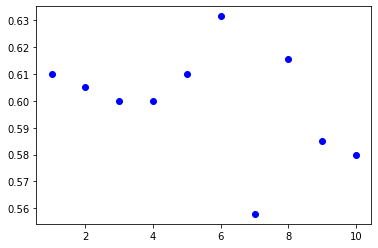

In [49]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()